# **REGRESIÓN LOGÍSTICA**

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
mainpath = "/content/"
#mainpath = "C:/Users/Usuario/Desktop/"
filename = "bankmod.csv"
fullpath = os.path.join(mainpath, filename)

In [2]:
data = pd.read_csv(fullpath,sep=",")

In [3]:
data

,age,job,marital,month,dayofweek,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,target
0,56,housemaid,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10648,73,retired,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,1
10649,46,blue-collar,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,0
10650,56,retired,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,0
10651,44,technician,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [4]:
data.shape

(10653, 12)

###Estandarización de las variables númericas


In [5]:
from sklearn.preprocessing import StandardScaler
data[['age', 'previous','empvarrate','conspriceidx',"consconfidx","euribor3m","nremployed"]]=StandardScaler().fit_transform(data[['age', 'previous','empvarrate','conspriceidx',"consconfidx","euribor3m","nremployed"]])

### Conversión de las variables categóricas a dummies

 



In [6]:
categories = ['job', 'month','dayofweek',"marital"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [7]:
data_vars = data.columns.values.tolist()

In [8]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["month_sep",'age', 'previous','job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'dayofweek_fri', 'dayofweek_mon', 'dayofweek_thu', 'dayofweek_tue',
       'dayofweek_wed', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown']]

In [9]:
data = data[to_keep]
data.columns.values

array(['empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m',
       'nremployed', 'target'], dtype=object)

In [10]:
bank_data_vars = data.columns.values.tolist()
Y = ['target']
X = [v for v in bank_data_vars if v not in Y]

In [11]:
data[X]

,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
0,1.221893,1.415527,0.934807,1.107212,0.610008
1,1.221893,1.415527,0.934807,1.107212,0.610008
2,1.221893,1.415527,0.934807,1.107212,0.610008
3,1.221893,1.415527,0.934807,1.107212,0.610008
4,1.221893,1.415527,0.934807,1.107212,0.610008
...,...,...,...,...,...
10648,-0.324199,2.995309,-1.915619,-1.167632,-2.182618
10649,-0.324199,2.995309,-1.915619,-1.167632,-2.182618
10650,-0.324199,2.995309,-1.915619,-1.167632,-2.182618
10651,-0.324199,2.995309,-1.915619,-1.167632,-2.182618


In [12]:
data[Y]

,target
0,0
1,0
2,0
3,0
4,0
...,...
10648,1
10649,0
10650,0
10651,1


### Selección de rasgos para el modelo

In [13]:
n = 5

In [14]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()

In [16]:
rfe = RFE(lr, n)
rfe = rfe.fit(data[X], data[Y].values.ravel())

In [17]:
print(rfe.support_)

[ True  True  True  True  True]


In [18]:
print(rfe.ranking_)

[1 1 1 1 1]


In [19]:
z=zip(X,rfe.support_, rfe.ranking_)
list(z)

[('empvarrate', True, 1),
 ('conspriceidx', True, 1),
 ('consconfidx', True, 1),
 ('euribor3m', True, 1),
 ('nremployed', True, 1)]

In [20]:
cols = ["empvarrate","conspriceidx","nremployed","consconfidx","euribor3m"]
 

In [21]:
X = data[cols]
Y = data["target"]

###Implementación del modelo en Python con statsmodel.api

In [22]:
import statsmodels.api as sm
logit_model = sm.Logit(Y, X)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.437426
         Iterations 7


In [24]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.361    
Dependent Variable: target           AIC:              9329.8031
Date:               2021-02-07 08:56 BIC:              9366.1711
No. Observations:   10653            Log-Likelihood:   -4659.9  
Df Model:           4                LL-Null:          -7294.3  
Df Residuals:       10648            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
empvarrate      -1.4867   0.1395 -10.6539 0.0000 -1.7602 -1.2132
conspriceidx     2.8646   0.1042  27.4867 0.0000  2.6604  3.0689
nremployed       4.8693   0.2213  22.0028 0.0000  4.4355  5.3030
consconfidx      1.9880   0.0531  37.4341 0.0000  1.8839  2.0921
euribor3m       -5.6150   0.1948 -28.8197 0.0000 -5.9969 -5.2332
================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [25]:
from sklearn import linear_model

In [26]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
logit_model.score(X,Y)

0.758565662254764

In [28]:
1-Y.mean()

0.5648174223223505

In [29]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,empvarrate,[-1.2052481338187098]
1,conspriceidx,[2.613552567850026]
2,nremployed,[4.42317167634885]
3,consconfidx,[1.8318960554561108]
4,euribor3m,[-5.311637289200197]


## Validación del modelo logístico

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [32]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
probs = lm.predict_proba(X_test)

In [34]:
prediction = lm.predict(X_test)

In [35]:
prediction

array([0, 0, 0, ..., 1, 1, 0])

In [36]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.135676,0
1,0.356839,0
2,0.156608,0
3,0.878568,1
4,0.575792,1


In [37]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,1899
1,1297


In [38]:
from sklearn import metrics

In [39]:
metrics.accuracy_score(Y_test, prediction)

0.7675219023779725

## Validación cruzada

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=30)

In [42]:
scores

array([0.88202247, 1.        , 0.88764045, 0.56619718, 0.56619718,
       0.56619718, 0.56056338, 0.56619718, 0.56619718, 0.56619718,
       0.96056338, 1.        , 0.71549296, 0.56619718, 0.56619718,
       0.67605634, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.43661972,
       0.43661972, 0.43661972, 0.43661972, 0.43661972, 0.43661972])

In [43]:
scores.mean()

0.7277211584111413

## Matriz de Confusión y curva ROC

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [45]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
probs = lm.predict_proba(X_test)

In [47]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.135676,0,0
1,0.356839,0,0
2,0.156608,0,0
3,0.878568,1,1
4,0.575792,1,1


In [48]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [49]:
confusion_matrix

actual,0,1
prediction,,
0,1484,415
1,328,969


In [50]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [51]:
sens = TP/(TP+FN)
sens

0.7471087124132614

In [52]:
espc_1 = TN/(TN+FP)
espc_1

0.7814639283833597

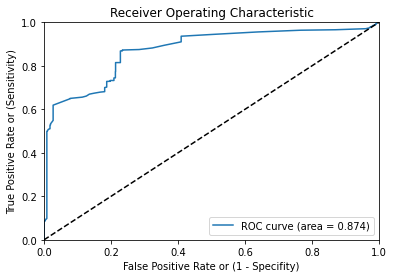

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
probs1 = lm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,probs1)
roc_auc = roc_auc_score(Y_test,probs1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [54]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [55]:
auc = metrics.auc(espc_1, sensit)
auc

0.8735054677232068

## Resumen de los predictores de clasificación

In [56]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(Y_test, prediction))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1812
           1       0.75      0.70      0.72      1384

    accuracy                           0.77      3196
   macro avg       0.76      0.76      0.76      3196
weighted avg       0.77      0.77      0.77      3196



